# Final Project

Import labraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Open Data Frame 

In [48]:
df = pd.read_csv("bird_dino_data.csv")

In [49]:
df.head()

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3)
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15
3,4,D,0.25,0.050,0.41,0.16,0.09,0.12
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08


In [50]:
print(len(df))

25


Add colunm called whole brain 

In [51]:
df["Whole Brain"] = df["Olfactory bulbs (cm3)"] + df["Cerebrum (cm3)"] + df["Optic Lobes (cm3)"] + df["Cerebellum (cm3)"] + df["Brain Stem (cm3)"]
df.head()

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Whole Brain
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06,1.959
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68,22.036
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15,15.096
3,4,D,0.25,0.050,0.41,0.16,0.09,0.12,0.830
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08,2.193


Add colunm for cereburm to whole brain

In [73]:
df["Cerebrum to Whole"] = df["Cerebrum (cm3)"] / (df["Whole Brain"]*1000)
df.head()

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Whole Brain,Cerebrum to Whole,Brain to Body Mass
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06,1.959,0.000781,97.950000
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68,22.036,0.000763,17.488889
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15,15.096,0.000734,6.924771
3,4,D,0.25,0.050,0.41,0.16,0.09,0.12,0.830,0.000494,3.320000
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08,2.193,0.000716,219.300000


Compare Cerebrum to Whole Brain

In [74]:
df["Brain to Body Mass"] = df["Whole Brain"] / df["Body Mass (kg)"]
df.head()

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Whole Brain,Cerebrum to Whole,Brain to Body Mass
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06,1.959,0.000781,97.950000
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68,22.036,0.000763,17.488889
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15,15.096,0.000734,6.924771
3,4,D,0.25,0.050,0.41,0.16,0.09,0.12,0.830,0.000494,3.320000
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08,2.193,0.000716,219.300000


Average the Birds and the Dino 

In [75]:
#cerebrum to whole bird 
CWB = df["Cerebrum to Whole"].loc[df["Bird vs Dino"]=="B"]
avgCWB = CWB.mean()

In [76]:
#body to whole bird
BBB= df["Brain to Body Mass"].loc[df["Bird vs Dino"]=="B"]
avgBBB = BBB.mean()

In [77]:
#cerebrum to whole dino
CWD = df["Cerebrum to Whole"].loc[df["Bird vs Dino"]=="D"]
avgCWD = CWD.mean()

In [78]:
#brain to body dino
BBD= df["Brain to Body Mass"].loc[df["Bird vs Dino"]=="D"]
avgBBD = BBD.mean()

Create a function of Femur Lenght, Brain Volume, Cerebrum Width, Whole brain widht 
return: Bird or dino brain 

In [79]:
def conv(dinosaur, femur):
    if dinosaur == "theropod":
        return 10**(3.1854*np.log10(femur)-3.184)/1000
    elif dinosaur == "sauropod":
        return 10**(2.3459*np.log10(FL)-0.2935)/1000
    else:
        return 10**(3.0587*np.log10(FL)-2.7042)/1000

In [80]:
your_brainBM = conv("theropod", 7)
print(your_brainBM)

0.0003220885577143592


In [81]:
#voulme vs weight cm3 = g
#body mass times 1000
olf = 0.05
cere = 0.275
opt = 0.25
cereb = 0.225

In [82]:
def info(femur,vol,cere,olf,opt,cerebe):
    bm_kg = conv("theropod",femur)
    your_BB = vol/bm_kg*1000
    your_whole = olf + cere + opt + cerebe
    your_CW = cere/your_whole
    if abs(your_BB - avgBBB) > abs(your_BB - avgBBD):
        bm_ans =  "Bird"
    elif abs(your_BB - avgBBB) < abs(your_BB - avgBBD):
        bm_ans =  "Dino"
        
    if abs(your_CW - avgCWD)>abs(your_CW - avgCWB):
        cw_ans =  "Bird"
    elif abs(your_CW - avgCWD)<abs(your_CW - avgCWB):
        cw_ans =  "Dino"
    return [bm_ans,cw_ans]

In [83]:
info(7,1.4,cere,olf,opt,cereb)

['Dino', 'Bird']

# Coding Challenge Make a Graph

In [84]:
#body mass x axis 
#brain mass y axis 
#bird info one scatter plot
#brain info one scater
#our brain scatter plot

In [85]:
#body mass
BMB = df["Body Mass (kg)"].loc[df["Bird vs Dino"] == "B"]
BMD = df["Body Mass (kg)"].loc[df["Bird vs Dino"] == "D"]

In [86]:
#brain mass
BRB = df["Whole Brain"].loc[df["Bird vs Dino"] == "B"]
BRD = df["Whole Brain"].loc[df["Bird vs Dino"] == "D"]

In [87]:
#our dino brain
my_whole = olf + cere + opt + cereb
my_bm = conv("theropod",7)

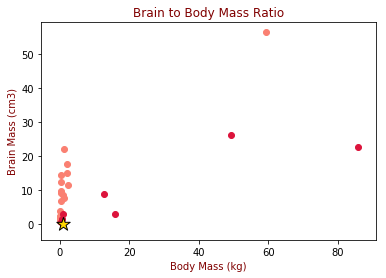

In [88]:
plt.scatter(BMB, BRB, color = "salmon")
plt.scatter(BMD, BRD, color = "crimson")
plt.scatter(my_whole, my_bm, marker = "*", s = 200, color = "gold", edgecolor = "k")
plt.xlabel("Body Mass (kg)", color = "maroon")
plt.ylabel("Brain Mass (cm3)", color = "maroon")
plt.title("Brain to Body Mass Ratio", color = "maroon")
plt.show()